# Pytorch Computer Vision

## 0. Computer vision libraries

* Torchvision - base domain library
* torchvision.datasets - gets datasets and data loading functions for computer vision
* torchvision.models - get pre-trained models
* torchvision.transforms - functions for manipulating your vision data (images) to be suitable for use with an ML model
* torch.utils.data.Dataset - based dataset class
* torch.utils.data.DataLoader - Creates a python iterable over a dataset

In [1]:
# Imports
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt



## 1. Getting a dataset

The dataset we'll be using: "FashionMNIST" from torchvision.datasets

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to
    train=True, # Grabbing the training dataset instead of test set
    download=True,
    transform=ToTensor(), # How do we want to tranform data
    target_transform=None # How do we want to transform labels/targets
)

# Setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.74MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.47MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# First training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
image.shape

torch.Size([1, 28, 28])

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 2.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

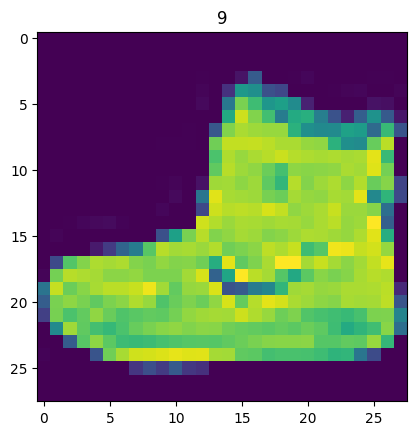

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
image

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

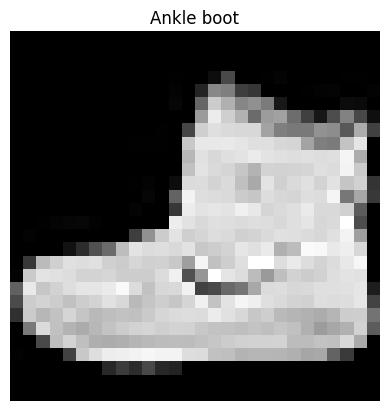

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [11]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [12]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [13]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [14]:
# Check shape of our data
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [15]:
class_names[label]

'Ankle boot'

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


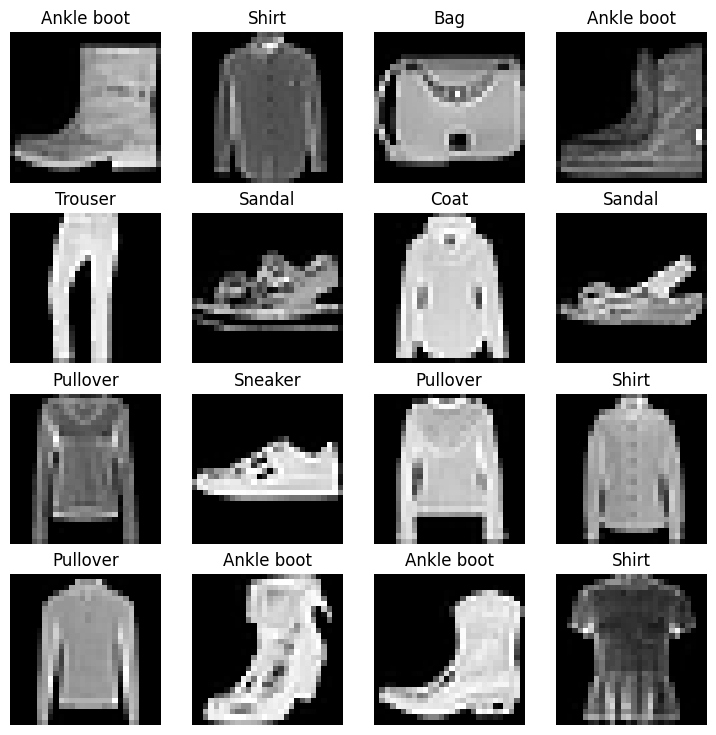

In [16]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1): # same thing as (1,17)
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  print(random_idx)
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

Right now the data is in the form of pytorch datasets

DataLoader turns dataset into a python iterable

More specifically, we want to turn our data into batches/mini-batches

Why?:

1. More computationally efficient
2. It gives our NN more chances to upgrade gradient per epoch


In [17]:
from torch.utils.data import DataLoader

# Setup batch size hyperparameter
BATCH_SIZE=32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b7bc5b69390>,
 <torch.utils.data.dataloader.DataLoader at 0x7b7bc7efa890>)

In [18]:
# Check it out
print(f"Dataloader: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7b7bc5b69390>, <torch.utils.data.dataloader.DataLoader object at 0x7b7bc7efa890>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [19]:
# Check out what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Label: 8, Class: Bag, Image shape: torch.Size([1, 28, 28])


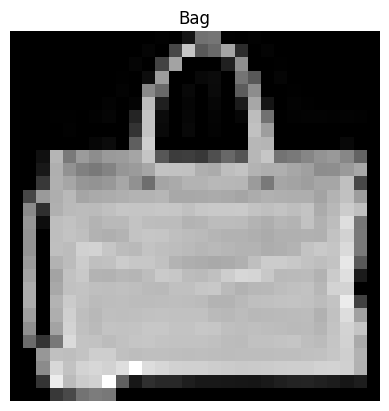

In [20]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Label: {label}, Class: {class_names[label]}, Image shape: {img.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try to improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [21]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape}") # [color channels, height, width]
print(f"Shape after flattening: {output.shape}") # [color channels, height*width]

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


# Think of it like this:

Imagine you have a picture, and it's like a grid of pixels (think of a chessboard). Each square has a number representing its color. Now, if you want to feed this information into a different type of neural network layer called a "dense layer" or "fully connected layer", these layers don't understand the grid-like structure. They need the information presented as one long line of numbers.

So, "flattening" is like taking all the numbers from the rows of the grid, and laying them out, one after the other, in a single, long line.

This prepares the data so that the next layers can easily process all the features (the important details extracted from the image) as a simple list of values, instead of a complicated grid.  

In [22]:
from torch import nn
class FashionMNISTV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    self.layer_stack(x)
    return self.layer_stack(x)

In [23]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTV0(
    input_shape=784, # 28*28
    hidden_units=10,
    output_shape=len(class_names) # One for every class
).to("cpu")

model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [25]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer, and evaluation metrics

* Loss Function - Since we are working with multi-class data, our loss function will be nn.CrossEntropyLoss()
* Optimizer - Our optimizer will be SGD
* Evaluation metric - Since we are working on a classification problem, accuracy is a good metric



In [26]:
import requests
from pathlib import Path


# Download helper functions from PyTotch repo
if Path("helper_functions.py").is_file():
  print("Already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [27]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)



### 3.2 Creating a function to time our experiments

Machine Learning is very experimental.

Two of the mian thinks you want to track:
1. Models performance (loss and accuracy values etc)
2. How fast it runs

In [28]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [29]:
start_time = timer()
# Some code
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


4.151199999569144e-05

### 3. Creating a training and testing loop on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss **per batch**.
3. Loop through testing batches, perform testing steps, calculate the test loss **per batch**.
4. Print out whats happening.
5. Time it.


In [30]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42) # making your randomness less random by giving it a starting point
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()  # Put model into training mode
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTest loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Test loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Test loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Test loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 25.435 seconds


## 4. Make predicitons and get Model 0 results

In [31]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
  '''Returns a dictionary containing the results of model predicting on data_loader.'''
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Move data to target device
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn,
           device="cpu") # Model 0 is on CPU

## 5. Setup device agnostic code



In [32]:
!nvidia-smi

Mon Jul 14 21:46:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [33]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02 in same repo.





In [34]:
# Create model with non-linear and linear layers
class FashionMNISTV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.flatten = nn.Flatten()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    x = self.flatten(x)
    return self.layer_stack(x)

In [35]:
device

'cuda'

In [36]:
torch.manual_seed(42)

model_1 = FashionMNISTV1(
    input_shape=784, # 28*28 image
    hidden_units=10,
    output_shape=len(class_names)).to(device) # send to gpu if available

next(model_1.parameters()).device

device(type='cuda', index=0)

In [37]:
# Loss and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionizing training and testing loops

* training loop - 'train_step()'
* test loop - 'test_step()'

In [38]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    '''Performs a training step with model trying to learn on data_loader'''
    train_loss, train_acc = 0, 0

    # Put model in training mode
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        # Move data to device
        X, y = X.to(device), y.to(device)

        # Cast inputs to float (important for some models)
        X = X.to(torch.float32)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Loss and Accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Use .item() to get a Python number
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # 3. Zero gradients
        optimizer.zero_grad()

        # 4. Backward pass
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Get average loss and accuracy per batch
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n")

In [39]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    '''Performs a testing step with model on data_loader'''
    test_loss, test_acc = 0, 0

    # Set model to evaluation mode
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            X = X.to(torch.float32)

            test_pred = model(X)

            # Accumulate loss as tensor
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Compute mean of test loss tensor
        test_loss = test_loss / len(data_loader)
        test_acc = test_acc / len(data_loader)

        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [40]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create an optimization and evaluation loop using train_step and test_step
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.09199 | Train acc: 61.34%

Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
-------
Train loss: 0.78101 | Train acc: 71.93%

Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
-------
Train loss: 0.67027 | Train acc: 75.94%

Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 27.758 seconds


>**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than on GPU.
>
>Why is this?
>1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by GPU.
>2. The hardware being used has a better compute capability than the GPU (rare)

In [41]:
model_0_results # Baseline model

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [42]:
total_train_time_model_0

25.434830602999995

In [43]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device) # Pass the device here
model_1_results

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [44]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## Model 2: Building a convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data

**CNN Explainer is a helpful website**

In [45]:
from torch import nn

# Create a CNN
class FashionMNISTV2(nn.Module):
  '''Model architecture that replicates the TinyVGG model from CNN explainer website.'''
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, # Smaller kernel sizes are usually better, allowing for a deeper architecture and higher information extraction
                  stride=1, # The number of pixels the kernel window moves or "slides" over the input each time
                  padding=1), # Conserves data at the borders of activation maps and can help preserve the inputs spatial size
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                      stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                      stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # 10*7*7 from 10 hidden units and height and width from output of conv_block_2, inner dimensions must match
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    #(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

In [46]:
torch.manual_seed(42)

model_2 = FashionMNISTV2(input_shape=1, # 1 because it is grayscale, would be 3 if it was r,g,b.
                         hidden_units=10,
                         output_shape=len(class_names)).to(device)

In [47]:
rand_image_tensor = torch.rand(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [48]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], device='cuda:0', grad_fn=<AddmmBackward0>)

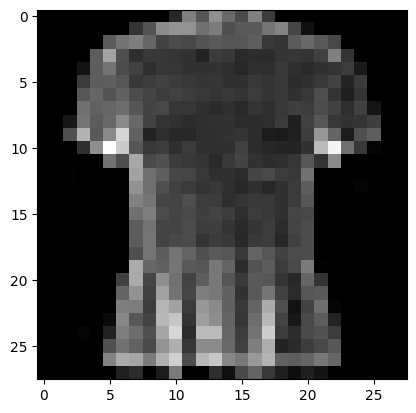

In [49]:
plt.imshow(image.squeeze(), cmap="gray")

### 7.1 Stepping through nn.conv2d()



In [50]:
torch.manual_seed(42)

# Create batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0] # [color_channels, height, width]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [51]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3, # same as (3,3)
                       stride=1,
                       padding=0)

# Pass the data through conv layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [52]:
torch.manual_seed(42)
model_2 = FashionMNISTV2(input_shape=1,
                         hidden_units=10,
                         output_shape=len(class_names)).to(device)

### 7.2 Stepping through nn.MaxPool2d

In [53]:
test_image.shape

torch.Size([3, 64, 64])

In [54]:
# Print out original image shape wihtout unsqueezed dimension
print(f"Test image original shape: {test_image.shape} ")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape} ")

# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Test image through conv layer: {test_image_through_conv.shape}")

# Pass data through max pool layer
test_image_through_conv_and_pool = max_pool_layer(test_image_through_conv)
print(f"Test image through max pool layer: {test_image_through_conv_and_pool.shape}")


Test image original shape: torch.Size([3, 64, 64]) 
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64]) 
Test image through conv layer: torch.Size([1, 10, 62, 62])
Test image through max pool layer: torch.Size([1, 10, 31, 31])


## Quick analogy:
Imagine you're scanning a photo through a small window — instead of remembering every tiny detail, you only keep the most intense highlight in each window, so you get a simpler but meaningful summary.

**Below showing .3367 is what the maxpool layer is doing**

In [55]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2)) # Changed size to (1,1,2,2)
print(f"Random tensor: {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through maxpool layer
max_pool_tensor = max_pool_layer(random_tensor)

# Print details
print(f"maxpool tensor: {max_pool_tensor}")
print(f"maxpool tensor shape: {max_pool_tensor.shape}")
random_tensor

Random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])
maxpool tensor: tensor([[[[0.3367]]]])
maxpool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

### 7.3 Setup loss function and optimizer of Model_2

In [56]:
import requests
from pathlib import Path


# Download helper functions from PyTotch repo
if Path("helper_functions.py").is_file():
  print("Already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Already exists


In [57]:
import os
print(os.listdir())

['.config', 'helper_functions.py', 'data', '__pycache__', 'sample_data']


In [58]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [59]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and Testing using train and test functions we built earlier

In [60]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59378 | Train acc: 78.53%

Test loss: 0.38784 | Test acc: 86.17%

Epoch: 1
-------
Train loss: 0.35899 | Train acc: 87.09%

Test loss: 0.34823 | Test acc: 87.02%

Epoch: 2
-------
Train loss: 0.32124 | Train acc: 88.42%

Test loss: 0.31568 | Test acc: 88.50%

Train time on cuda: 33.935 seconds


In [61]:
!nvidia-smi

Mon Jul 14 21:47:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P0             29W /   70W |     166MiB /  15360MiB |     12%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [62]:
# Get model 2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.31567680835723877,
 'model_acc': 88.49840255591054}

In [63]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 8. Compare model results and training time

In [65]:
import pandas as pd
compare_results = pd.DataFrame(data=[model_0_results,
                                     model_1_results,
                                     model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTV0,0.476639,83.426518
1,FashionMNISTV1,0.685001,75.019968
2,FashionMNISTV2,0.315677,88.498403


In [66]:
# Add training time to results comparison
compare_results["Training time"] = [f"{total_train_time_model_0:.3f}",
                                     f"{total_train_time_model_1:.3f}",
                                     f"{total_train_time_model_2: .3f}"]
compare_results

,model_name,model_loss,model_acc,Training time
0,FashionMNISTV0,0.476639,83.426518,25.435
1,FashionMNISTV1,0.685001,75.019968,27.758
2,FashionMNISTV2,0.315677,88.498403,33.935


Text(0, 0.5, 'Model')

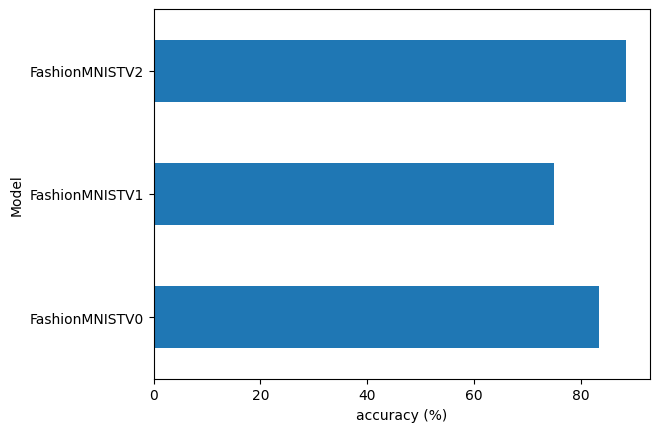

In [69]:
# Visualize model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("Model")

# 9. Make and evaluate random predictions with best model

In [88]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logits to prediction probabilities)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [78]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [100]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

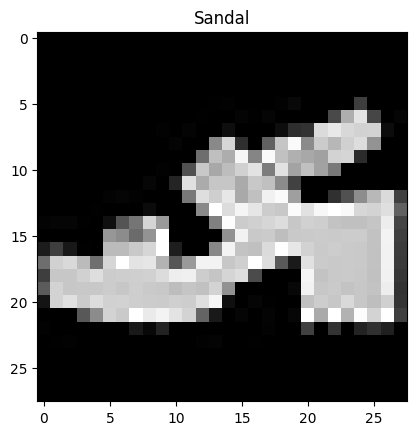

In [101]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [102]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)
# View first two prediction probabilities
pred_probs[:2]

tensor([[1.3737e-07, 7.5381e-08, 6.2428e-08, 7.5294e-08, 1.3274e-08, 9.9986e-01,
         1.7350e-07, 4.6207e-06, 2.4601e-05, 1.1243e-04],
        [2.4190e-02, 8.5740e-01, 2.9737e-04, 3.6331e-02, 3.1015e-02, 8.8080e-05,
         5.0530e-02, 4.7881e-05, 6.3469e-05, 4.0268e-05]])

In [103]:
# Convert pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [104]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

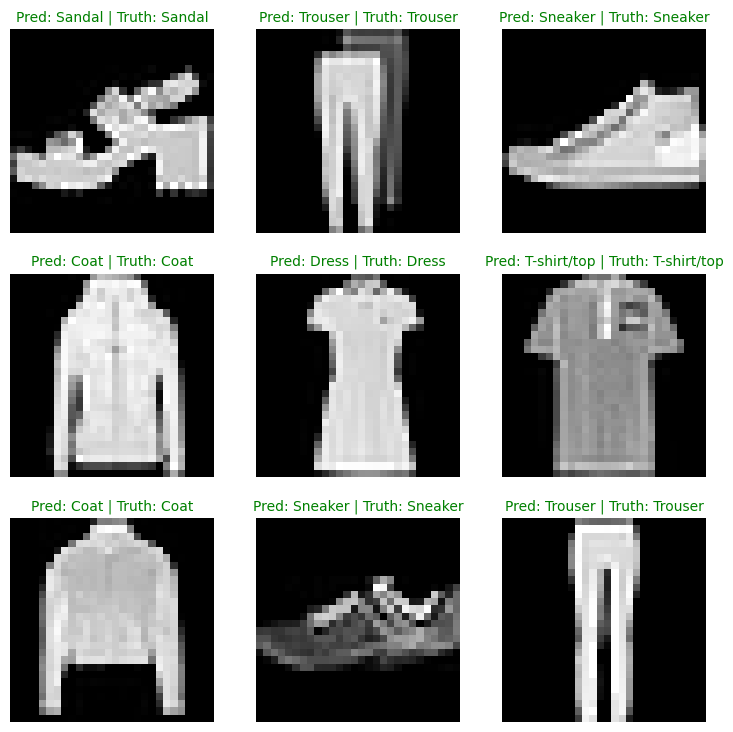

In [105]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find prediction label in text form
  pred_label = class_names[pred_classes[i]]

  # Get truth label
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)


## 10. Making a Confusion matrix for further prediction evaluation

- Very helpful for evaluating classification models

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix
3. Plot the confusion matrix


In [109]:
# Import tqdm.auto for progress tracking
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)

    # Do forward pass
    y_logit = model_2(X.to(device))

    # Turn predictions from logits to prediction probabilities to prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=1).argmax(dim=1)

    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]




Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [114]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"

except:
  !pip install -q torchmetrics mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


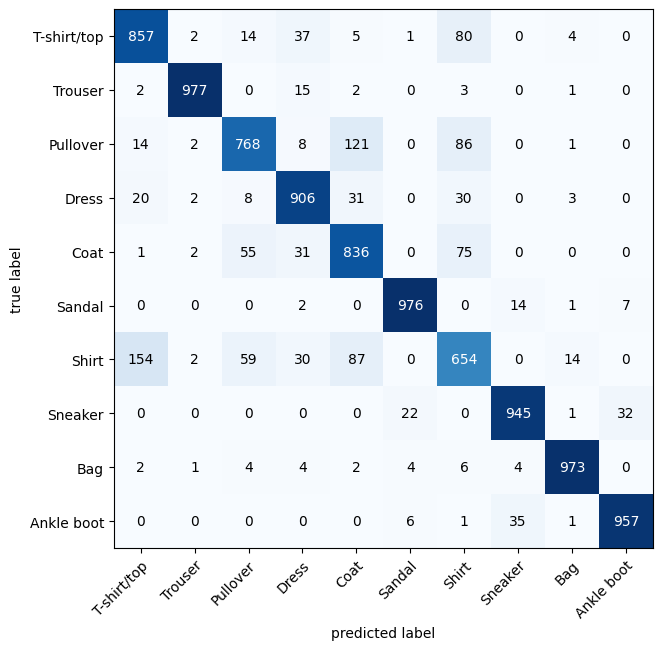

In [116]:
from torchmetrics.classification import MulticlassConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = MulticlassConfusionMatrix(num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), # matplotlib likes numpy
                                class_names=class_names,
                                figsize=(10, 7),
                                )




## 11. Save and load best performing model

In [118]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/03_pytorch_computer_vision_model_2.pt


In [119]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

# Load in the saved state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [120]:
# Evaluate loaded model
loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)
loaded_model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.31567680835723877,
 'model_acc': 88.49840255591054}

In [121]:
model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.31567680835723877,
 'model_acc': 88.49840255591054}

In [123]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=0.001) # Absolute tolerance

tensor(True)